<a href="https://colab.research.google.com/github/asadali163/Time-Series-Experiments/blob/main/codebase/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O airline.csv https://lazyprogrammer.me/course_files/airline_passengers.csv

--2024-07-10 10:26:18--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline.csv’

airline.csv         100%[===================>]   1.99K  --.-KB/s    in 0s      

2024-07-10 10:26:18 (30.4 MB/s) - ‘airline.csv’ saved [2036/2036]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:
df = pd.read_csv('airline.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.shape

(144, 1)

In [ ]:
df.isnull().sum()

Passengers    0
dtype: int64

<Axes: xlabel='Month'>

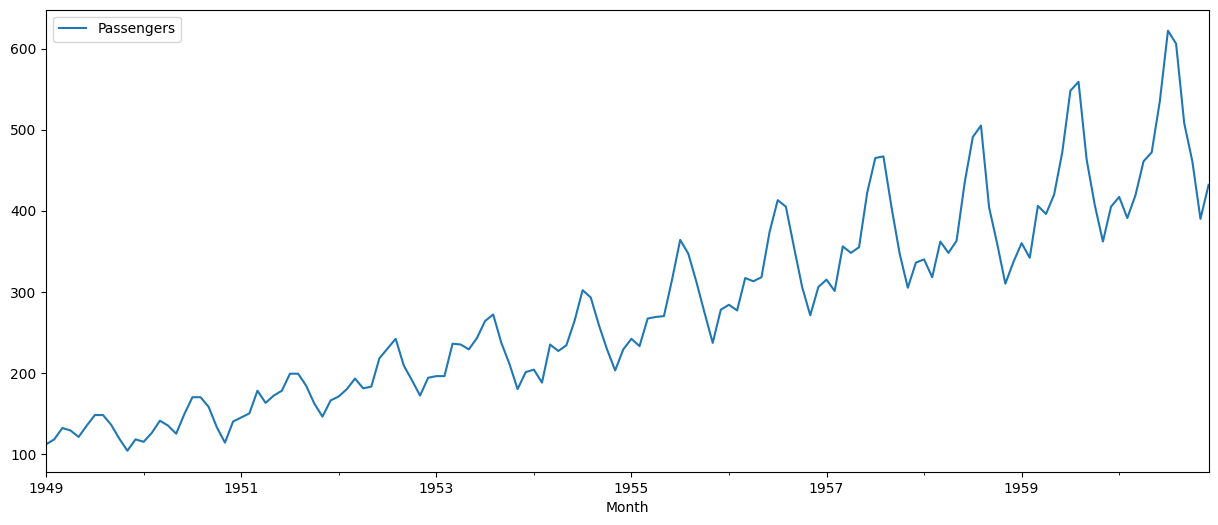

In [ ]:
df.plot(figsize=(15,6))

In [ ]:
df['1stDifference'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

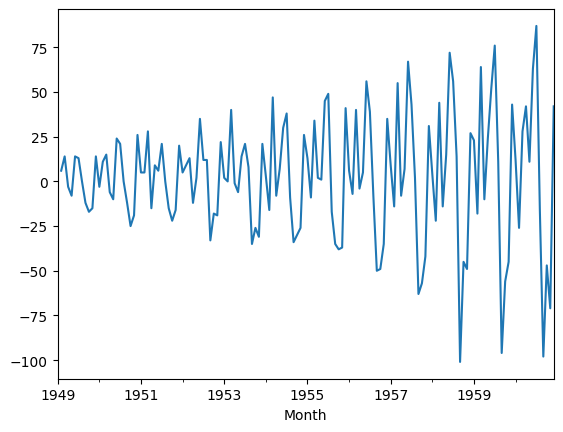

In [ ]:
df['1stDifference'].plot()

<Axes: xlabel='Month'>

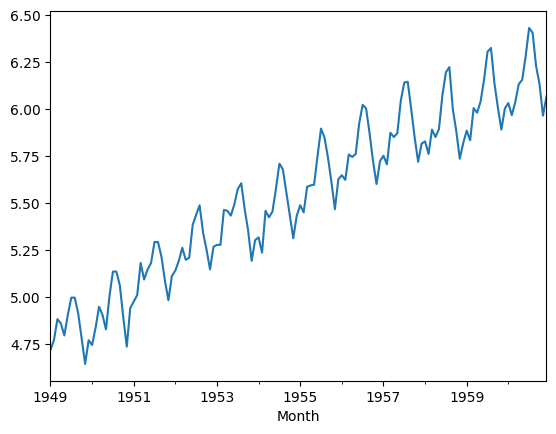

In [ ]:
df['LogPassengers'] = np.log(df['Passengers'])
df['LogPassengers'].plot()

<Axes: xlabel='Month'>

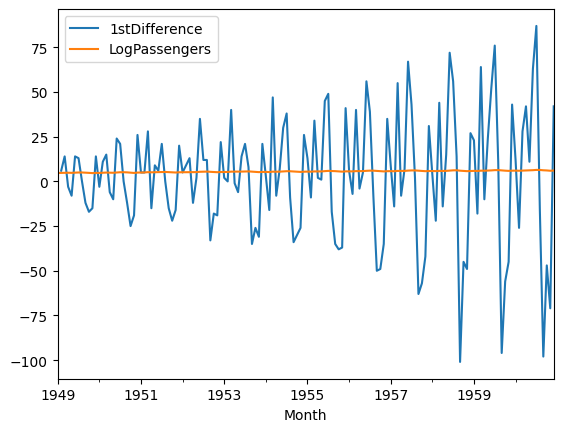

In [ ]:
df[['1stDifference', 'LogPassengers']].plot()

<Axes: xlabel='Month'>

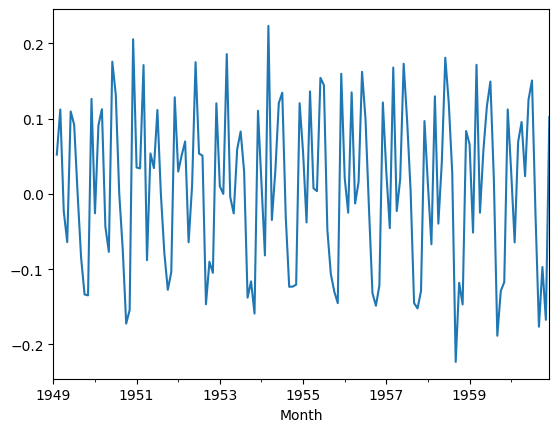

In [ ]:
df['LogPassengers'].diff().plot()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
N_test = 12
df_train = df[:-N_test]
df_test = df[-N_test:]

In [ ]:
train_idx = df.index <= df_train.index[-1]
test_idx = df.index > df_train.index[-1]

In [ ]:
arima = ARIMA(df_train['Passengers'], order=(1,0,0))
arima_model = arima.fit()
arima_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -642.188
Date:                Wed, 10 Jul 2024   AIC                           1290.376
Time:                        10:41:33   BIC                           1299.024
Sample:                    01-01-1949   HQIC                          1293.890
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        262.4900     59.459      4.415      0.000     145.953     379.027
ar.L1          0.9618      0.020     47.210      0.000       0.922       1.002
sigma2       965.3628    111.663      8.645      0.000     746.507    1184.218
===================================================================================
Ljung-Box (L1) (Q):                  11.49   Jarque-Bera (JB):                 0.67
Prob(Q):                              0.00   Prob(JB):                         0.71
Heteroskedasticity (H):               7.93   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
in_samples = arima_model.predict(start = df_train.index[0], end = df_train.index[-1])
df.loc[train_idx, 'AR(1)'] = in_samples

In [ ]:
prediction = arima_model.get_forecast(steps=N_test)
forecast = prediction.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

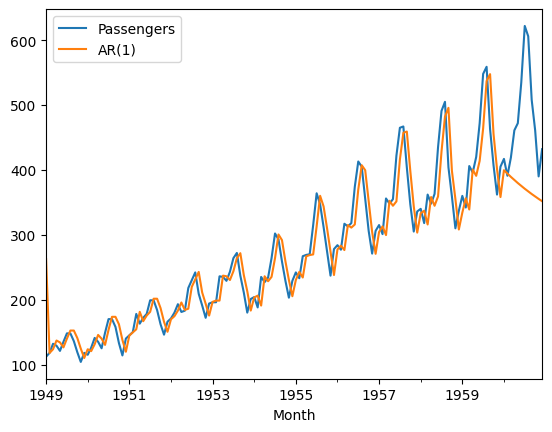

In [ ]:
df[['Passengers', 'AR(1)']].plot();

In [ ]:
prediction.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [ ]:
def plot_fit_and_forecast(result):
  fig, ax = plt.subplots(figsize=(15,6))
  ax.plot(df['Passengers'], label='Data')

  train_pred = result.fittedvalues
  ax.plot(df_train.index, train_pred, color='green', label='fitted')

  # Forecast the result
  forecast = result.get_forecast(N_test)
  forecast_ci = forecast.conf_int()
  lower, upper = forecast_ci['lower Passengers'], forecast_ci['upper Passengers']
  forecast_mean = forecast.predicted_mean
  ax.plot(df_test.index, forecast_mean, label='forecast', color='yellow')
  ax.fill_between(df_test.index, lower, upper, color='red', alpha=0.5, label='confidence')

  ax.legend()


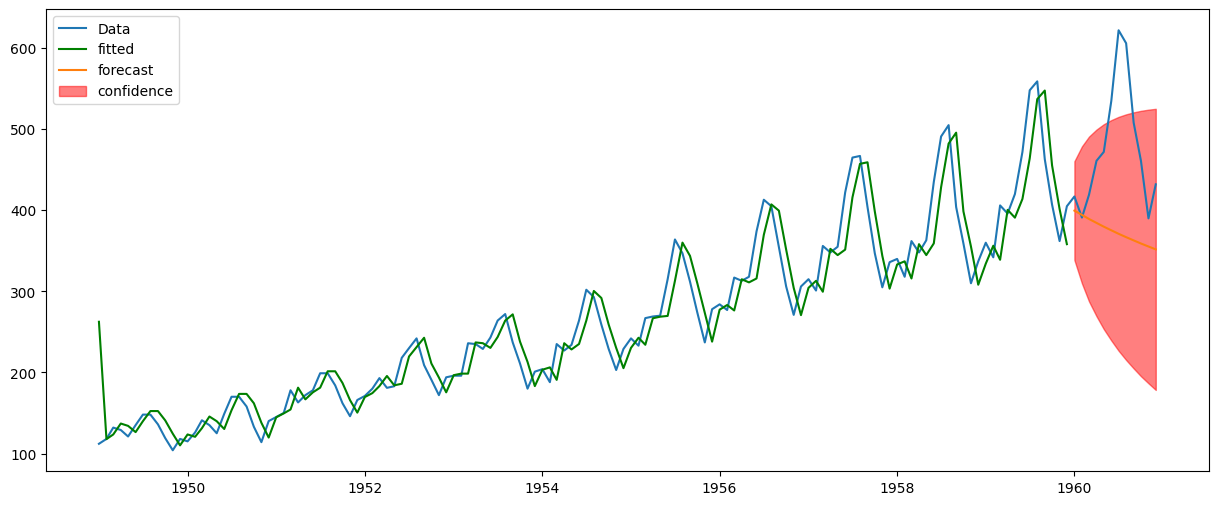

In [ ]:
plot_fit_and_forecast(arima_model)

##### Let's try the AR(10) model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


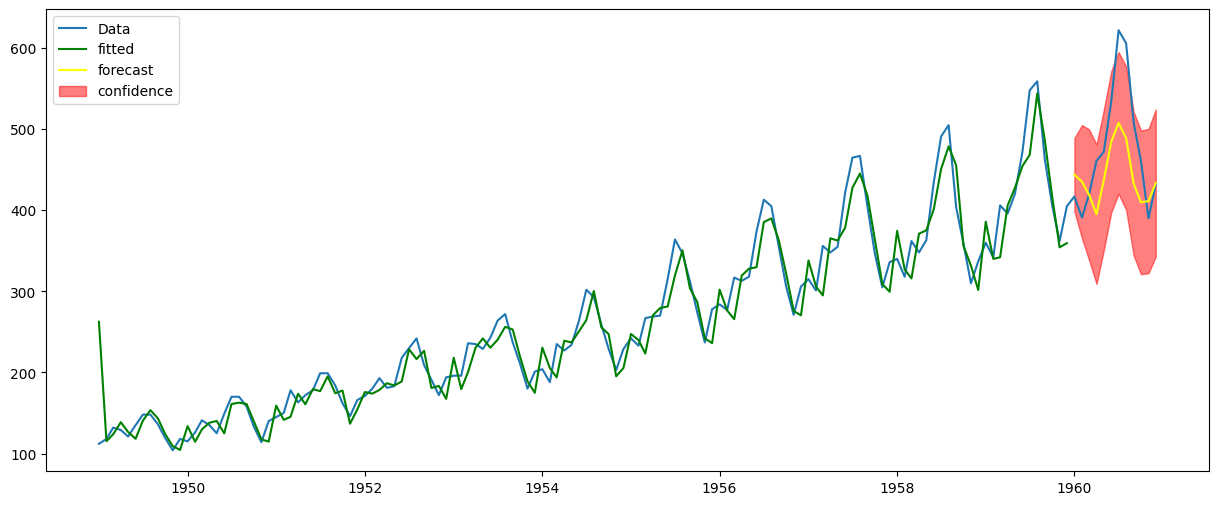

In [ ]:
model = ARIMA(df_train['Passengers'], order=(10,0,0))
result = model.fit()
plot_fit_and_forecast(result)

##### Let's try MA(1) model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


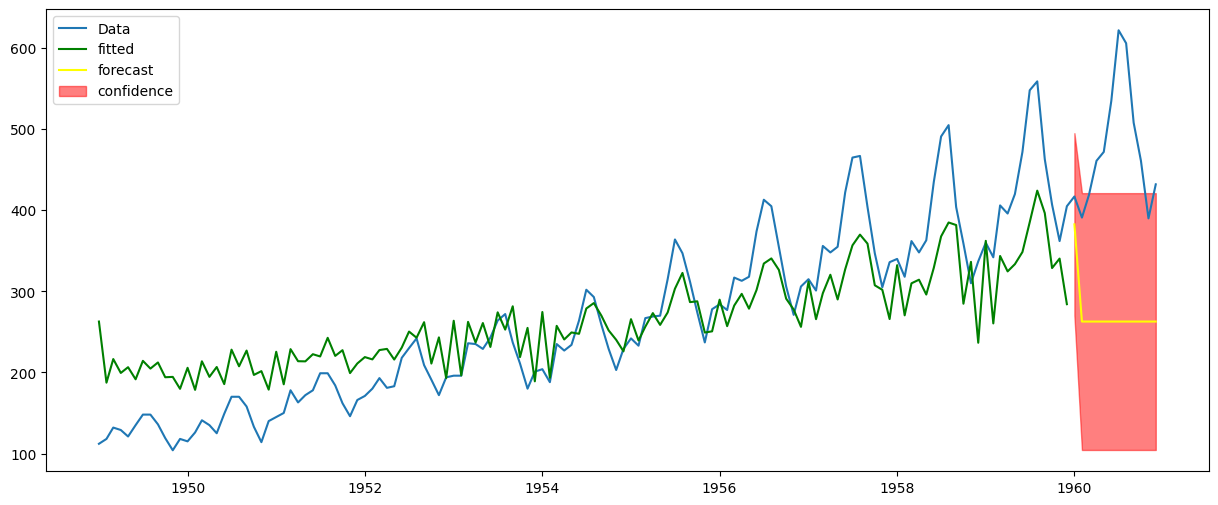

In [ ]:
model = ARIMA(df_train['Passengers'], order=(0,0,1))
result = model.fit()
plot_fit_and_forecast(result)

In [ ]:
df['Log1stDifference'] = df['LogPassengers'].diff()

<Axes: xlabel='Month'>

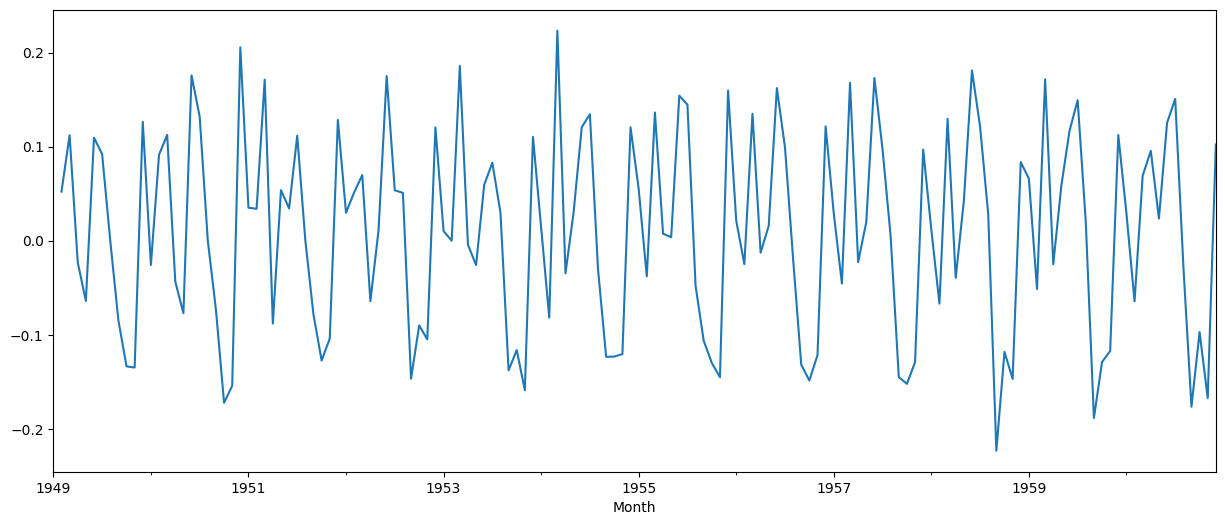

In [ ]:
df['Log1stDifference'].plot(figsize=(15,6))

##### As we see the the first columns has null value, so the previous function will not work <br> Let's create another function

In [ ]:
def plot_fit_and_forecast_int(result, d, col='Passengers'):
  fig, ax = plt.subplots(figsize=(15,6))
  ax.plot(df[col], label='Data')

  # Plot curve fitted on train data
  train_pred = result.predict(start = df_train.index[d], end = df_train.index[-1])
  ax.plot(df_train.index[d:], train_pred, color='green', label='fitted')

  # forecast the test result
  prediction = result.get_forecast(N_test)
  conf_int = prediction.conf_int()
  lower, upper = conf_int['lower ' + col], conf_int['upper ' + col]
  forecast = prediction.predicted_mean
  ax.plot(df_test.index, forecast, label='forecast', color='yellow')
  ax.fill_between(df_test.index, lower, upper, color='red', alpha=0.5, label='confidence')

  ax.set_title(f'ARIMA({d},0,0)')
  ax.legend();

##### Let's try (8,1,1) model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


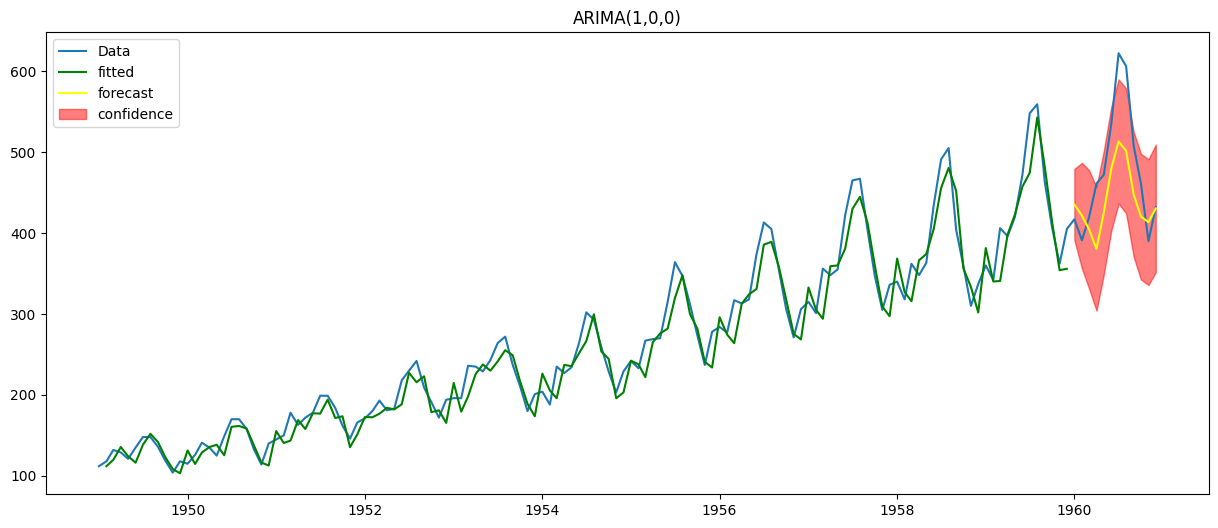

In [ ]:
model = ARIMA(df_train['Passengers'], order=(8,1,1))
result_811 = model.fit()
plot_fit_and_forecast_int(result_811,1)

##### Now try with Log data

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


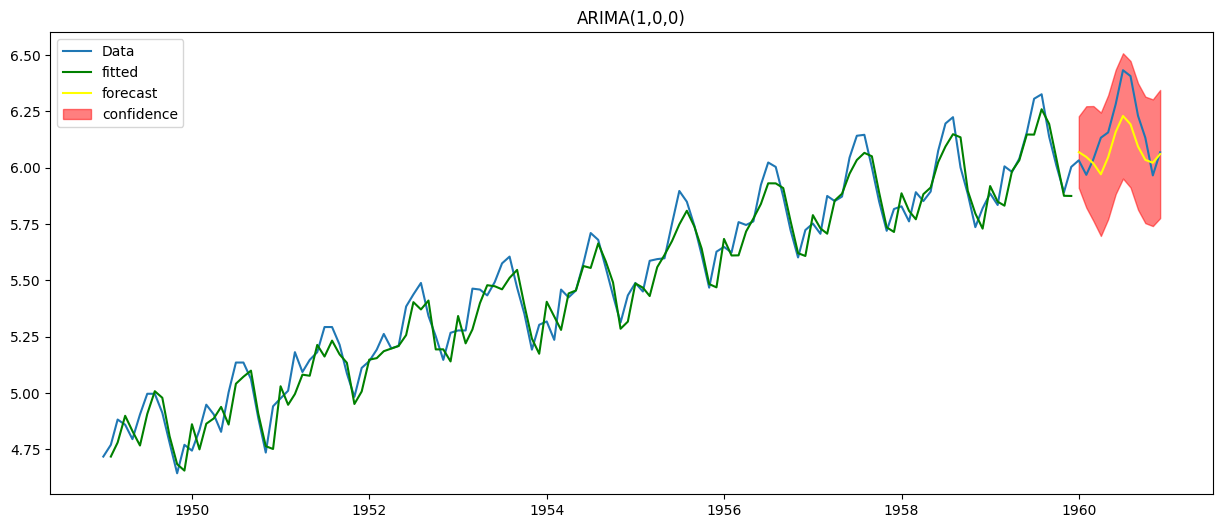

In [ ]:
model = ARIMA(df_train['LogPassengers'], order=(8,1,1))
result_811 = model.fit()
plot_fit_and_forecast_int(result_811,1, col='LogPassengers')

##### As the data is yearly, so let's try (12,1,0) model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


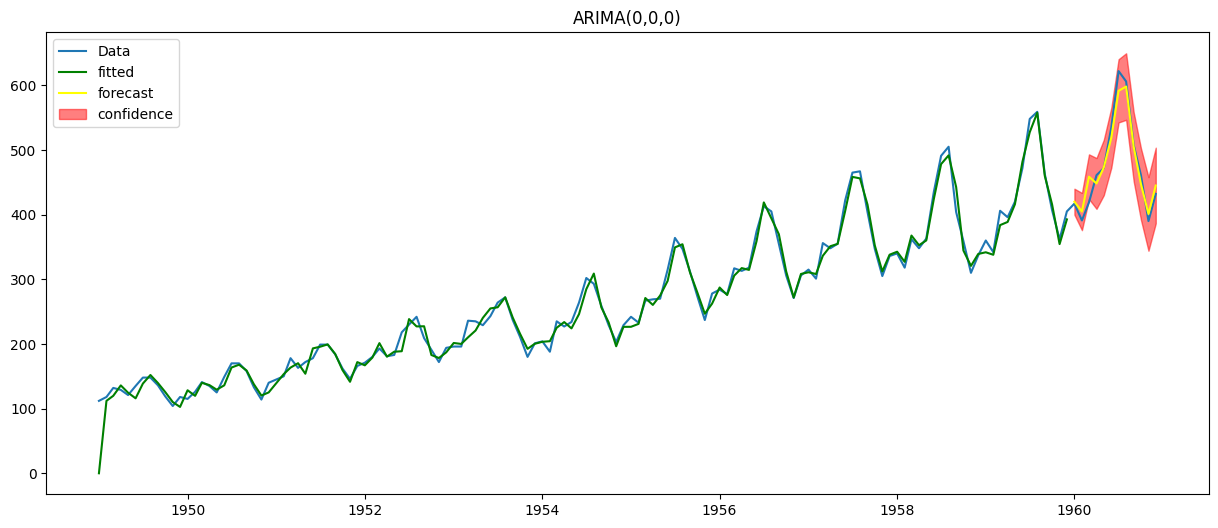

In [ ]:
model = ARIMA(df_train['Passengers'], order=(12,1,0))
result_1210 = model.fit()
plot_fit_and_forecast_int(result_1210,0)

##### Now, let's try on Log data

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


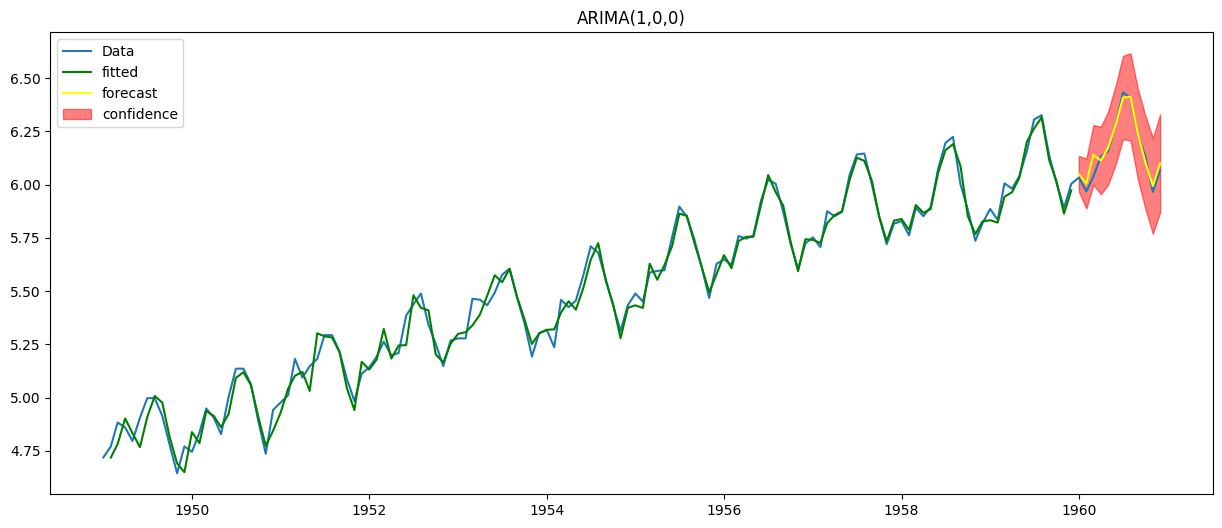

In [ ]:
model = ARIMA(df_train['LogPassengers'], order=(12,1,0))
result_log_1210 = model.fit()
plot_fit_and_forecast_int(result_log_1210,1, col='LogPassengers')

##### Now let's calculate the rmse for both log and with out log

In [ ]:
def find_rmse(result, is_logged):
  forecast = result.forecast(N_test)

  if is_logged:
    forecast = np.exp(forecast)

  t = df_test['Passengers']
  y = forecast
  return np.sqrt(np.mean((t-y) ** 2))


In [ ]:
print(f'RMSE with out log: {find_rmse(result_1210, False)}')
print(f'RMSE with log: {find_rmse(result_log_1210, True)}')

RMSE with out log: 17.492713114526254
RMSE with log: 16.130971144527244
